# La Regression Linéaire avec Numpy

In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [26]:
#Set the datasets with make_regression
x, y = make_regression(n_samples=100, n_features=1, noise=10)
#reshape y
y = y.reshape(y.shape[0], 1)

In [27]:
#transform x as a matrix with 100x2 order the 2nd colown fill with 1
X = np.hstack((x, np.ones(x.shape)))

In [16]:
X

array([[-1.05487135,  1.        ],
       [ 0.11600916,  1.        ],
       [-2.03391856,  1.        ],
       [-0.99793981,  1.        ],
       [ 0.9719258 ,  1.        ],
       [-1.80329797,  1.        ],
       [ 0.26248408,  1.        ],
       [-1.37180921,  1.        ],
       [ 0.89114866,  1.        ],
       [ 0.60536146,  1.        ],
       [-1.22244624,  1.        ],
       [ 0.52968726,  1.        ],
       [ 0.4089802 ,  1.        ],
       [ 0.31820233,  1.        ],
       [-0.14643066,  1.        ],
       [ 0.48257562,  1.        ],
       [-0.01021842,  1.        ],
       [ 0.94404162,  1.        ],
       [-0.12799608,  1.        ],
       [-0.09897069,  1.        ],
       [ 2.4189527 ,  1.        ],
       [-0.06920076,  1.        ],
       [ 0.09745521,  1.        ],
       [-0.99351328,  1.        ],
       [ 0.01427422,  1.        ],
       [-0.97438437,  1.        ],
       [-0.90240768,  1.        ],
       [-1.30948959,  1.        ],
       [ 0.35238197,

## Parameters initialization
$\theta = \begin{bmatrix} a \\ b \end{bmatrix}$

In [20]:
theta = np.random.randn(2, 1)
theta

array([[0.44049739],
       [1.05623039]])

# The Model Lineaire


# F.$\theta$

In [21]:
def model(x, theta):
    return x.dot(theta)

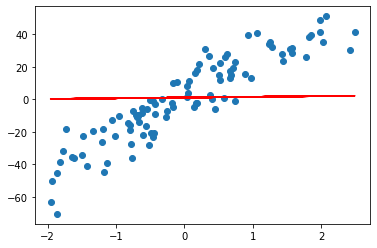

In [28]:
model(X, theta)
plt.scatter(x,y)
plt.plot(x, model(X, theta),c='r')

# the Loss function
J($\theta$)=$\frac{1}{2m}$ $\sum_{n=0}^{n=m}$(X.$\theta$ - Y)$^{2}$
  
  this function must minimise our error >> tend to zeros

In [30]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m)*np.sum(model(X, theta) - y)**2

cost_function(X, y, theta)

39.24118265427659

# Gradient & Gradient descents
$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m} X^{T}(X.\theta - Y)$

In [31]:
def grad(X, y, theta):
    m = len(y)
    return 1/m*X.T.dot(model(X, theta) - y)

$\theta : \theta - \alpha*\frac{\partial J(\theta)}{\partial \theta}$

In [40]:
def grad_descent(X, y, theta, learning_rate, n_iter):
    cost_history = np.zeros(n_iter)
    for i in range(0, n_iter):
        theta = theta - learning_rate*grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [46]:
theta_final, cost_history = grad_descent(X, y, theta, learning_rate=0.01, n_iter=400)

In [47]:
predictions = model(X, theta_final)

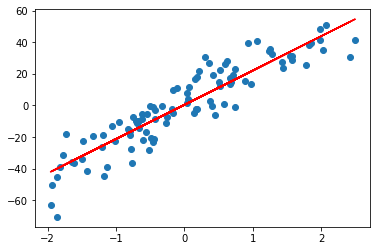

In [48]:
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

# Cost_history

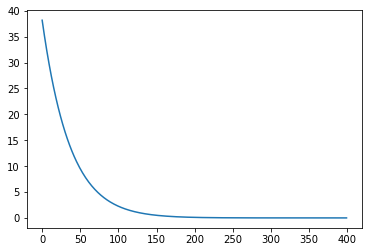

In [50]:
plt.plot(range(400), cost_history)

## Calcul du R2 pour mesurer la performance de notre modele
$R^{2}$ = 1 - $\frac{\sum (y - pred)^{2}}{\sum (y - mean(y))^{2}}$

In [53]:
def coef_det(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v
    

In [54]:
coef_det(y, predictions)

0.8445307150693954